# Выявление закономерностей, которые определяют успешность игры 

**Цель проекта:** выявить определяющие успешность игры закономерности, благодаря которым можно будет найти потенциально популярный продукт и спланировать рекламные кампании.


**Задачи проекта:** 
- сделать предварительный анализ данных, определить ключевые показатели по жанрам и платформам
- найти закономерности и точки влияния на примере успешных игр
- составить портрет пользователя каждого региона

**Описание данных:** нам предоставлены данные до 2016 года, где содержится вся информация об играх разных платформ, а именно: год выпуска, место продаж, жанр игры, оценки критиков и пользователей и рейтинг от организации ESRB.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Содержание набора данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### План анализа:
- Обзор и подготовка данных (анализ и обработка ошибок).
- Провести исследовательский анализ данных (анализ по годам, жанрам, платформам и отзывам)
- Визуализировать полученные данные.
- Составить портрет пользователя каждого региона
- Сформулировать и проверить гипотезы о выручке.
- Итоговый вывод и рекомендации.

### Оглавление

1. [Обзор и подготовка данных](#one) </n>
2. [Исследовательский анализ данных](#two)
3. [Портрет пользователя каждого региона](#three)
4. [Проверка гипотез](#four)
5. [Итоговый вывод](#five)

-----

# <a id="one"> Обзор и подготовка данных</a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

games_data = pd.read_csv('/datasets/games.csv')

In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Комментарий к данным

В таблице предоставлены данные по 16715 играм. Есть типы данных, которые скорее всего придется поменять. Например, год выпуска имеет тип float64, а лучше, чтобы тип был int. 

Есть пропуски: 
- В столбце с именем всего два пропуска, что скорее всего ошибка при выгрузке. К тому же, пропуски совпадают с пропусками в столбце Genre. Думаю, что их можно удалить, так как два значения относительно всей таблицы, это очень мало, а пропуски могут помешать при анализе. 
- 269 пропусков в столбце с годом выпуска. Вероятно это ошибка при заполнение базы, так как их не мало, а год выпуска есть у каждой игры. Можно попробовать узнать год выпуск и заполнить вручную, но их немало.
- В столбце Critic_Score почти половина значений пропущено. Это важный показатель, а пропусков очень много. Так же много пропусков в столбце с оценкой пользователей — около 6 тысяч. Попробуем их заполнить, если будет нужно для анализа. 
- В столбце Rating 6766 пропусков, и это может быть потому, что играм начали присваивать рейтинг с определенного года — скорее всего рейтинг не указан у игр, которые вышли давно. Проверим это.

In [6]:
#проверим сопадают ли пропуски в столбцах Name и Genre
games_data.query('Genre != Genre')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
#проверим правда ли рейтинг отсуствует только у старых игр
games_data.query('Rating != Rating')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В таблице видно, что рейтинг отсутствует также у игр выпущенных в 2016 и 2005 году, значит дело не в этом. Посмотрим дальше в чем еще может быть причина.

----

## Подготовка данных

### 1. Заменим названия столбцов — приведем к нижнему регистру

In [8]:
games_data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales', 
                      'other_sales', 'critic_score', 'user_score', 'rating']

### 2. Обработаем пропуски

Посмотрим на пропуски в отзывах.

In [9]:
games_data['user_score'].isnull().sum()  #6701
games_data['critic_score'].isnull().sum()  #8578

8578

В столбце critic_score 8578 пропусков, а в user_score 6701 пропуск — это много, но дальше станет понятно, что эти столбцы нужны нам, чтобы оценить данные за 1-2 последних года.

In [10]:
games_data.query('year_of_release == 2016')['critic_score'].isnull().sum()

270

Почти половина пропусков за 2016 год.

Так как нам важно определить показатели по продажам для каждой платформы, то и заполнить было был логичнее средним значением для каждой платформы, но поможет ли это? Возможно будет лучше посмотреть зависимость по тем показателям, которые уже есть, чтобы не искажать результат. Посмотрим как заполнить лучше, когда это понадобится. Будем учитывать исходя из задачи.

### 3. Преобразуем данные в нужные типы

В столбце, где указан год 269 пропусков, и их будет сложно заменить точной датой выхода. В некоторых названиях указан год, но присвоить их автоматически не получится. Но нам нужно поменять тип данных, так как целочисленное значение больше подходит для указания года. 

Думаю, что заменить пропуски нулями или другими значениями будет некорректно, поэтому оставлю пропуски, а тип заменю на Int16.

In [11]:
#проверим количество пропусков и изменим тип данных

#games_data.query('year_of_release != year_of_release').head(20) #269 — примерно два процентра
games_data['year_of_release'] = games_data['year_of_release'].astype('Int16')

Дальше поменяем тип в столбце user_score, так как оценка может показать нам завиимость, а для этого ей нужен числовой тип.

In [12]:
games_data['user_score'].value_counts().head(15)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
Name: user_score, dtype: int64

### Комментарий

Кроме числовых значений, здесь встречается значение «tbd». Буквы tba означают to be announced. Перевод простой — «будет объявлено дополнительно». Вероятно, это пометка означает, что оценка не выставлена, но должна быть. Таких значений много и они не помогут нам определить зависимость. Оставим ее как есть, потому что заменять нет смысла — мы исказим результат. Поменяем тип обходя это значение, а сравнивать будем только по числовым.

In [13]:
games_data['user_score'] = pd.to_numeric(games_data.query('user_score != "tbd"')['user_score'])

### 4. Найдем суммарные продажи во всех регионах

In [14]:
#проверим есть ли пропуски в столбце с прожажами, прежде чем считать сумму

#games_data['eu_sales'].isnull().sum()
#games_data['na_sales'].isnull().sum()
#games_data['jp_sales'].isnull().sum()
games_data['other_sales'].isnull().sum() #пропусков нет

0

In [15]:
#посчитаем сумму продаж по всем регионам и сохраним в отдельный столбец total_sales
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

#заменим тип данных, чтобы в столбце были целочисленные значения
games_data['total_sales'] = games_data['total_sales'].astype('int')

games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31


Эти данные помогут нам позже составить рейтинги, чтобы проверить гипотезы и прописать портрет пользователя.

----

# <a id="two"> Исследовательский анализ данных</a>

Чтобы сделать прогноз на следующий год, нужно проанализировать несколько аспектов и выбрать наиболее важные показатели. В этом разделе рассмотрим:
- Cколько игр выпускалось в разные годы?
- Как менялись продажи по платформам?
- Какая платформа потенциально прибыльная?
- Как менялись глобальные продажи игр в разбивке по платформам?
- Как влияют отзывы пользователей и критиков на продажи?
- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Cколько игр выпускалось в разные годы

Посчитаем сколько игр было выпущено в каждый год, чтобы понять, за какие годы данные нужны нам для анализа.

In [16]:
#найдем количество выпущенных игр за каждый год
games_data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

#### Комментарий

Больше всего данных представлено с 2006 по 2011 годы, но нам нужно дать прогноз на 2017 года, так что для анализа оставим данные за 2016 и 2015 годы. За 2016 было выпущено 502 игры, а за 2015 - 606 игр. Мне кажется, что также можно посмотреть выходили ли эти игры в предыдущие года и посмотреть были ли они популярны. Ведь игры часто выпускают обновленными или просто с новыми частями. Так мы получим немного больше информации, раз у нас есть данные за прошлые года.

In [17]:
#посмотрим на срез за 2016 год
games_data.query('year_of_release == 2016').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4


In [18]:
#посмотрим на данные за предыдущие годы

#games_data.query('year_of_release == 2013').head(10) 
#games_data.query('year_of_release == 2014').head(10) 
games_data.query('year_of_release == 2015').head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7


#### Комментарий

Вот, например, игры FIFA и Call of Duty выходили два года подряд, так что можно посмотреть на их популярность в предыдущие годы. 

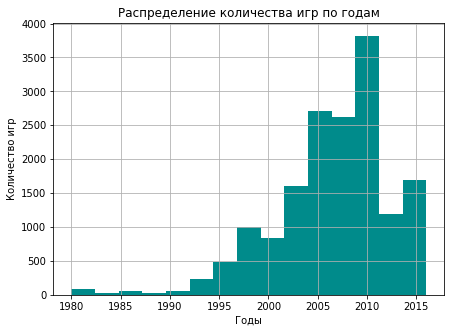

In [19]:
#построим распределение выпущенныхх игр по годам
games_data['year_of_release'].plot(kind='hist', color='darkcyan', bins=15, grid=True, figsize=(7,5), 
                                   title='Распределение количества игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')

plt.show()

In [20]:
#games_data.query('year_of_release <= 1995') #707
games_data.query('year_of_release <= 1995')['platform'].value_counts()

SNES    202
PS      116
2600    116
NES      98
SAT      71
GB       37
GEN      29
PC       15
NG       10
SCD       6
3DO       3
TG16      2
DS        1
GG        1
Name: platform, dtype: int64

### Промежуточный вывод

Мы не знаем все ли данные были занесены в эту таблицу, но на распределение видно, что до 2010 года количество выпущенных игр увеличивалось, а после начало снижаться. До 1995 года игр выпускалось очень мало — меньше 400 в год. За 15 лет, с 1980 по 1995 годы было выпущено всего 707 игр. 

Вероятно это связано не только с тем, что индустрия тогда только зарождалась, но и с тем, что самые популярные приставки тогда еще [не были запущены](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9). Например, PlayStation появилась в 1994 году, Xbox в 2001, а Game Boy Advance в 2000 году. А продажи Nintendo Wii были запущены в 2006 году — именно в тот года количество выпущенных игр превысило 1000 в год. 

-----

## Как менялись продажи по платформам

Проверим как менялись продажи по платформам. Для этого выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Это поможет нам понять за какой характерный срок появляются новые и исчезают старые платформы.

In [21]:
#найдем общую сумму продаж для каждой платформы за все годы

games_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                                          ascending=False).head(10)

,total_sales
platform,
PS2,645
X360,588
Wii,563
PS3,528
DS,414
PS,384
GB,220
NES,211
PS4,205


In [22]:
#на примере одной платформы из топа, проверим до какого года для нее выпускали игры
games_data.query('platform == "DS"')['year_of_release'].value_counts()

2008    492
2009    403
2007    376
2010    323
2006    201
2011    153
2005    118
2004     23
2012     23
2013      8
1985      1
Name: year_of_release, dtype: int64

### Комментарий

Если построить график по этим даннным, то мы увидим, что платформы, которые лидирует здесь могут вообще не иметь продаж в последние несколько лет. Например, Nintendo DS суммарно заработал 414 миллионов, но после 2013 для этой платформы ничего не выпускали, значит не стоит влючать ее в распределение.

In [23]:
#найдем суммарную выручку для платформа, которые выпускали игры в том числе с 2013 по 2016 год

total_sales_2013_2016 = (games_data
    .query('year_of_release == [2013,2014,2015,2016]')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

total_sales_2013_2016

,total_sales
platform,
PS4,205
PS3,97
XOne,96
3DS,87
X360,80
WiiU,35
PC,9
Wii,8
PSV,1


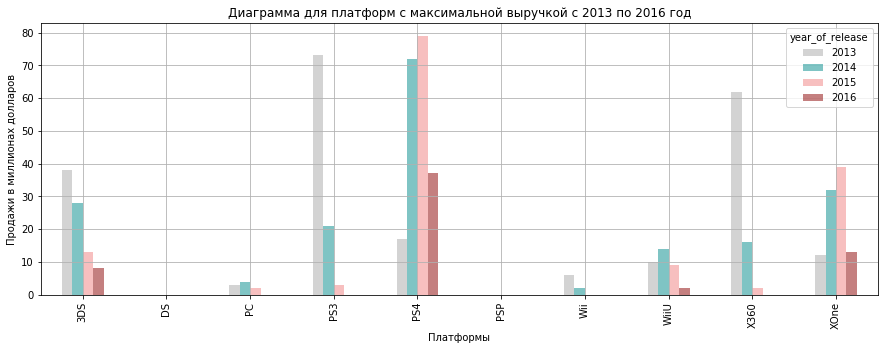

In [24]:
#построим распределение выручки за четыре года по девяти топовым платформам
#оставим только нужные столбцы

(games_data[['platform','year_of_release','total_sales']] 
 #оставим только нужные года
 .query('year_of_release == [2013,2014,2015,2016]')   
 #оставим только нужные платформы
 .query('platform == ["PSP","PS4", "PS3", "XOne", "3DS", "X360", "WiiU", "PC", "Wii","DS"]')
 #сгруппируем по платформам, чтобы получить суммарную выручку за каждый год по каждой платформе
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Диаграмма для платформ с максимальной выручкой с 2013 по 2016 год')
plt.xlabel('Платформы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

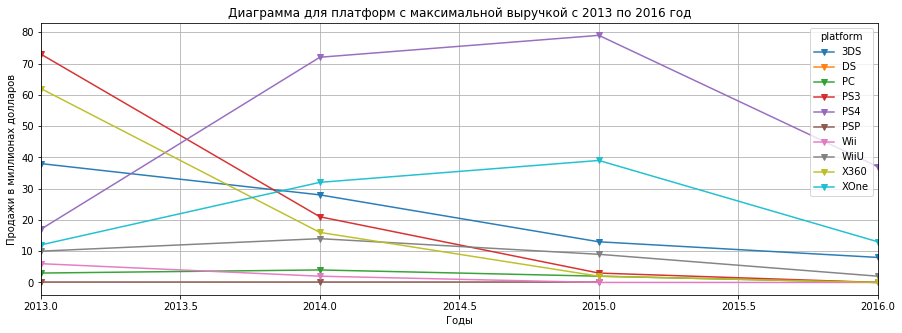

In [26]:
#построим распределение выручки за четыре года по девяти топовым платформам
#оставим только нужные столбцы

(games_data[['platform','year_of_release','total_sales']] 
 #оставим только нужные года
 .query('year_of_release == [2013,2014,2015,2016]')   
 #оставим только нужные платформы
 .query('platform == ["PSP","PS4", "PS3", "XOne", "3DS", "X360", "WiiU", "PC", "Wii","DS"]')
 #сгруппируем по платформам, чтобы получить суммарную выручку за каждый год по каждой платформе
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(alpha=0.95, figsize=(15,5), grid=True, marker='v')
)

plt.title('Диаграмма для платформ с максимальной выручкой с 2013 по 2016 год')
plt.xlabel('Годы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

## Комментарий

На графике представлены:
- PC — персональный компьютер


- Nintendo DS — 2004
- Nintendo Wii — 2006
- Nintendo 3DS — 2011
- Nintendo Wii U — 2012


- PSP (PlayStation Portable) — первые продажи консоли были начаты в Японии в **2004** году
- PlayStation 3 — выход PS3 в Японии состоялся в **2006** году
- PlayStation 4 — продажи начались в **2013** году


- Xbox 360 — запущен в продажу **2005** года 
- Xbox One — первые продажи начались в **2013** году


- В 2013 году лидировали PS3, X360 и 3DS
- В 2014 году: PS4, XOne и 3DS
- В 2015 году: PS4 и XOne
- В 2016 году: PS4 и XOne

По этим данным можно проследить как менялись продажи по платформам, за какой характерный срок появляются новые и исчезают старые платформы, как часто компании выпуcкают новые версии приставок, как растут и падают продажи по каждой.


----

## За какой характерный срок появляются новые и исчезают старые платформы

Для того, что определить за какой характерный срок появляются новые и исчезают старые платформы, проанализируем данные с 2005 года по 2016, так как в 2005 году появилась в продаже одна из популярных консолей Xbox 360.

**Актуальным же можно считать период с 2012 по 2016 год, так как в 2012 начали появляться новые консоли и терять продажи старые платформы. Это можно считать «закатом эпохи» старых консолей**.

In [27]:
#оставим только данные с 2005 года
games_data_after_2005 = games_data.query('year_of_release >= 2005')

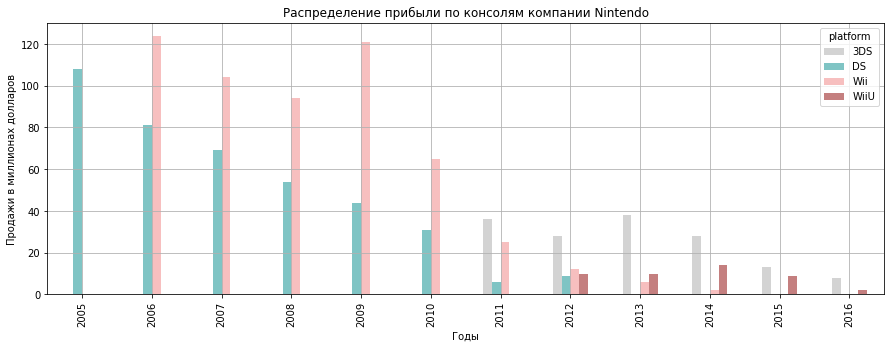

In [28]:
#построим диаграмму для консолей Nintendo

(games_data_after_2005[['platform','year_of_release','total_sales']] 
 .query('platform == ["3DS", "WiiU","Wii","DS"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение прибыли по консолям компании Nintendo')
plt.xlabel('Годы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

### Комментарий

- Первая консоль Nintendo — DS приносила прибыль с 2005 до 2012 года — 8 лет.
- Вторая платформа Wii появилась через год, в 2006 году и приносила прибыль с 2006 по 2012 год — 7 лет.
- Третья платформа 3DS появилась с через пять лет, после выхода последней — в 2011 году и приносит прибыль и в 2016 году — 6 лет.
- Четвертая платформа WiiU появилась через года после последнее, в 2012 году и приносит прибыль в 2016 — 5 лет.

Позже нужно сравнить какие платформы появлялись у конкурентов, чтобы можно было объяснить почему продажи резко упали.

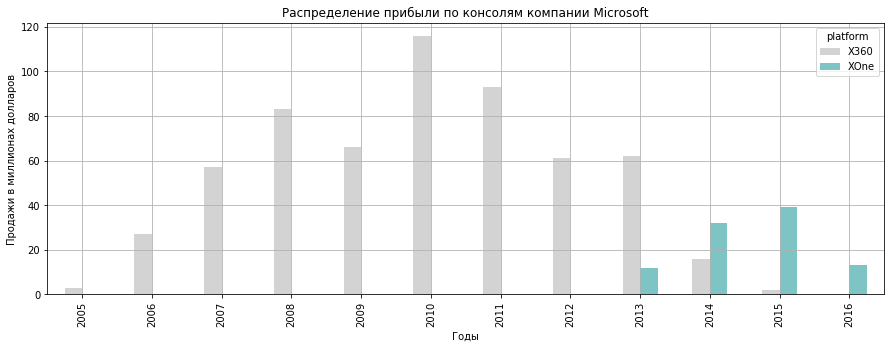

In [29]:
#построим диаграмму для консолей Microsoft

(games_data_after_2005[['platform','year_of_release','total_sales']] 
 .query('platform == ["XOne", "X360"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение прибыли по консолям компании Microsoft')
plt.xlabel('Годы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

### Комментарий

X360 приносит прибыль в течение 10 лет, а XOne появилась через 8 лет после выпуска первой консоли.

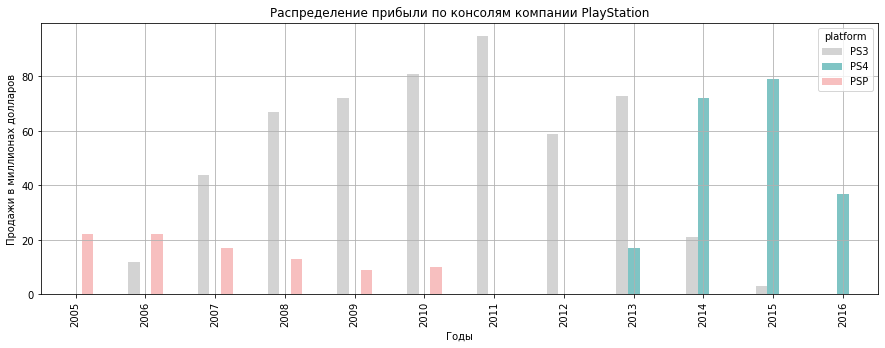

In [30]:
#построим диаграмму для консолей PlayStation

(games_data_after_2005[['platform','year_of_release','total_sales']] 
 .query('platform == ["PSP","PS4", "PS3"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение прибыли по консолям компании PlayStation')
plt.xlabel('Годы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

### Комментарий

- PSP появилась в 2005 году — в этом же году у Nintendo появилась портативная консоль DS, и вероятно они стали прямыми конкурентами. 


- PSP приносила прибыль с 2005 по 2010 — 5 лет.
- Через год, в 2006 появилась консоль PS3 и она приносила прибыль до 2015 года. Выручка начала резко снижаться после появления PS4.
- PS4 появилась через 7 лет после выхода последней — в 2013 году и приносит прибыль в 2016 в том числе.

### Вывод по характерному сроку

Новые платформы часто появляются исходя из выпуска конкурентов. Если же конкурентов нет, то новая консоль может просуществовать долго. Мне кажется, что нет какого-то характерного срока, и выпуск новой консоли напрямую зависит от появления новых консолей у конкурентов.

Портативные консоли вышли в один год, тогда, в 2005 году у Xbox не было конкурентов, и ровно через год появилась PS3 и Wii, которые смогли конкурировать с Xbox. После этого 4 года новые платформы не появлялись, ровно до момента, пока не появилась XOne — и сразу в 2011 появилась 3DS, в 2012 Wii U, в 2013 PS4. 

Также мне кажется, что нет характерного срока для исчезновения платформ. В среднем консоль приносит прибыль около 6 лет, но есть и те, кто без конкурентов существовал в разы больше. Я думаю, что при существовании конкурентом платформа исчезает примерно через 6 лет, но если появляется консоль нового поколения в любой компании, то прошлые консоли начинают терять выручку.

## Промежуточный вывод

#### 1. Анализ платформ
 - Самый популярные компании Sony и Microsoft стараются выпускать новые консоли одновременно, но выходят они не очень часто. При чем, старые консоли также продолжают покупать и использовать, просто постепенно спрос на них снижается. Так, например, PlayStation 3 и Xbox 360 были запущены с разнице всего в пару месяцев, а PlayStation 4 и Xbox One были запущены в один год.
 

 - Платформам нет смысла выпускать новые консоли слишком часто — вероятно, выпускают новые только тогда, когда технически старые консоли сильно устаревают, и уже не способны нормально воспроизводить новые игры.
 

 - Еще, большие продажи для консолей по сравнению с PC можно объяснить тем, что компании выкупают права на уникальные игры, в которые можно играть только на приставках. Из-за этого повышается спрос на ту или иную консоль.
 
#### 2. Анализ выручки

 - Рассмотрим три ведущие платформы:  PlayStation, Xbox и Nintendo.
Самую большую суммарную выручку за все года принесла консоль PS2, но я думаю, что это связано с тем, что она вышла одна из первых и просущестовала много лет практически без конкурентов. Ее поддержка прекратилась в 2012 году, так что рассматривать ее не будем. 


 - На второй месте по выручке X360 (588 миллионов), на третьем Nintendo Wii (563 миллиона), и на четвертом PlayStation 3 (528 миллионов), но если рассматривать распределение выручки за последние четыре года в данных, то выводы немного меняются.
 

 - с 2013 по 2016 год самые популярные такие: на первом месте **PlayStation 4 (205 миллионов), на втором PlayStation 3 (97 миллионов), на третьем Xbox One (96 миллионов)** — приведены на графике ниже.


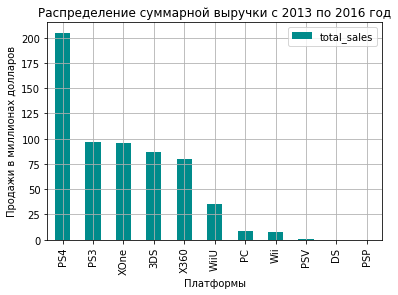

In [31]:
#распределение суммарной выручки с 2013 по 2016 год
total_sales_2013_2016.plot(kind='bar', color='darkcyan', grid=True);

plt.title('Распределение суммарной выручки с 2013 по 2016 год')
plt.xlabel('Платформы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

#### 3. Как менялись продажи по платформам

- У **Nintendo** продажи были значительно ниже, чем у других платформ. Причем каждая новая консоль приносила все меньше выручки с каждым годом. Самая прибыльная — это Nintendo 3DS — 87 миллионов за 4 года, но меньше 10 миллионов за последний год. Прибыль значительно снижалась с каждым годом.


- **Xbox** на втором месте по выручке — 96 млн. заработала XOne и 80 млн. X360. Для консоли XOne выручка росла до 2015 года, но в 2016 упала почти до выручки 2014 года. Вероятно это связано с тем, что в 2016 году у PlayStation вышла обновленная консоль PlayStation 4 Pro, которой еще нет в этой таблице. Xbox 360 была очень популярна в 2013 году, но с каждым годом продажи резко падали и в 2016 продаж было меньше, чем на один миллион.


- На графике можно выделить **PS3 и PS4** — у них рекордные продажи, которые превышают даже пиковые значения по самым популярным консолям конкурентов. Выручка по PS3 начала снижаться в 2014 году — как раз тогда появилась PS4. PlayStation 4 уже через год после запуска достигла прибыли больше 70 млн., а в 2015 — почти 80 млн. В 2016 выручка упала ниже 40 млн, но это все еще высокий показатель по графику.



#### За какой характерный срок появляются новые и исчезают старые платформы?

Новые платформы часто появляются исходя из выпуска конкурентов. Если же конкурентов нет, то новая консоль может просуществовать долго. Мне кажется, что нет какого-то характерного срока, и выпуск новой консоли напрямую зависит от появления новых консолей у конкурентов.

Также мне кажется, что нет характерного срока для исчезновения платформ. В среднем консоль приносит прибыль около 6 лет, но есть и те, кто без конкурентов существовал в разы больше. Я думаю, что при существовании конкурентом платформа исчезает примерно через 6 лет, но если появляется консоль нового поколения в любой компании, то прошлые консоли начинают терять выручку.

-----

## Выбор потенциально прибыльной платформы

Для того, чтобы построить прогноз на 2017 года, нам нужно взять данные за актуальный период. Данные за предыдущие года нам не понадобятся. Нам нужно определить какие платформы лидируют по продажам, на каких платформах продажи растут, а на каких падают. Попробуем определить потенциально прибыльные платформы.

Выше мы оценили прибыль по платформам с 2013 по 2016 годы, чтобы посмотреть как менялись показатели в течение нескольких лет. Теперь, чтобы составить прогноз на 2017 год, возьмем данные за последние пять лет — ведущие платформы в то время уже появились. За такое период можно проследить динамику.

In [32]:
games_data_after_2012 = games_data.query('year_of_release >= 2012')['platform'].value_counts()

Мы выяснили, что самые прибыльные платформы за последние два года — это PlayStation 4, Xbox One, Nintendo 3DS и Nintendo Wii U. Построим гистаграмму, чтобы оценить какая платформа приносит больше прибыли и проследим динамику за пять лет их существования.

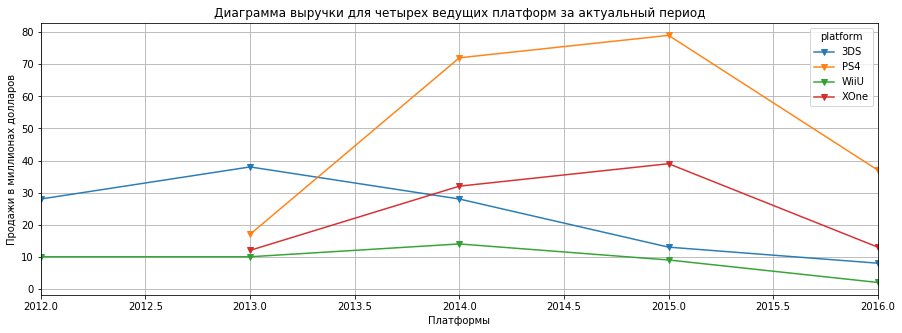

In [73]:
#построим диаграмму по выручке для четырех ведущих платформ за актуальный период

(games_data[['platform','year_of_release','total_sales']] 
 .query('year_of_release == [2012, 2013, 2014, 2015, 2016]')   
 .query('platform == ["PS4", "3DS", "XOne","WiiU"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(alpha=0.95, figsize=(15,5), grid=True, marker='v')
)

plt.title('Диаграмма выручки для четырех ведущих платформ за актуальный период')
plt.xlabel('Платформы')
plt.ylabel('Продажи в миллионах долларов')

plt.show()

### Комментарий

По всем четырем платформам продажи снизились почти на половину за последний год. PlayStation 4 остается самой прибыльной, XOne на втором месте, Nintendo имеет наименее прибыльные продажи по своим консолям.

### Анализ по количеству выпущенных игр

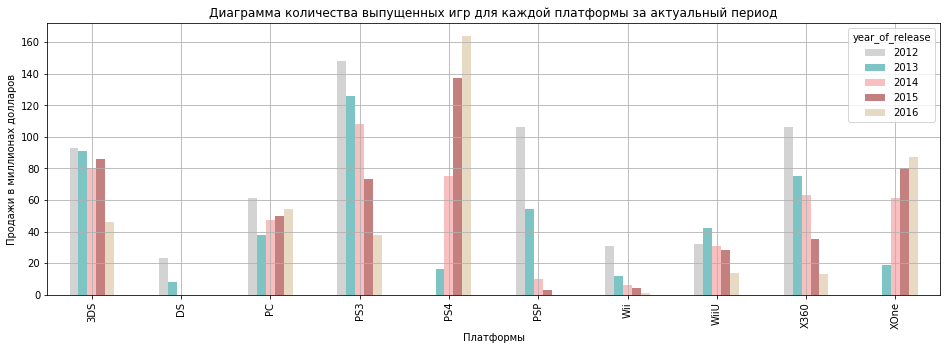

In [34]:
#посмотрим сколько игр было выпущено для каждой платформы за актуальный период

(games_data[['year_of_release','platform','name']] 
 .query('year_of_release == [2012, 2013, 2014, 2015, 2016]')   
 .query('platform == ["PSP","PS4", "PS3", "XOne", "3DS", "X360", "WiiU", "PC", "Wii","DS"]')
 .pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
 .plot(kind='bar', alpha=0.5, figsize=(16,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred', 'tan'))
)

plt.title('Диаграмма количества выпущенных игр для каждой платформы за актуальный период')
plt.xlabel('Платформы')
plt.ylabel('Продажи в миллионах долларов')

plt.show();

## Промежуточный вывод

В 2016 году выпустили больше игр для таких платформ, как: **PC, PS4 и XOne**. Можно предположить, что разработчики игр считают эти консоли перспективными, а потому выпускают больше игр для них. 

Для некоторых платформ показатели снижаются в течение нескольких лет, несмотря на то, что в 2016 прибыль довольно высокая. Нужно отметить платформы, где выручка растет несколько лет — это **PS4, XOne и PC**.

Важно отметить, что здесь выделились PC — компьютеры никуда не исчезнут, и игры для них будут актуальны намного дольше, чем для игровых консолей, так что нужно выделить эту платформу несмотря на низкие продажи.

----

## Глобальные продажи игр в разбивке по платформам

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам и проанализируем полученные результаты.

In [35]:
#построим сводную таблицу по глобальным продажам игр за 2015 и 2016 годы

(games_data
 .query('year_of_release == [2015,2016]')
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,116
XOne,52
3DS,21
WiiU,11
PS3,3
PC,2
X360,2
PSP,0
PSV,0


In [36]:
#найдем суммарную прибыль для каждой платформы за последние два года в таблице
(games_data
 .query('year_of_release == [2015,2016]')
 .query('platform == ["PS4", "3DS", "XOne","WiiU","PC","PS3"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

platform,3DS,PC,PS3,PS4,WiiU,XOne
year_of_release,,,,,,
2015,13,2,3,79,9,39
2016,8,0,0,37,2,13


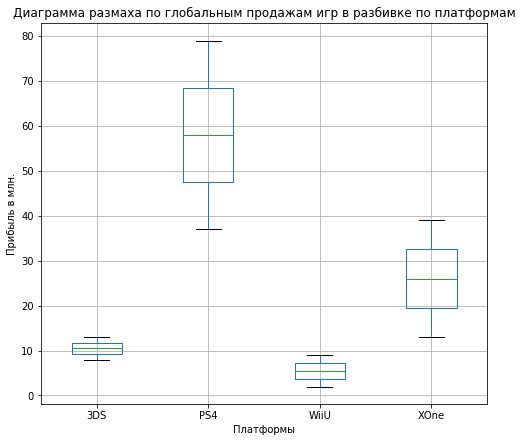

In [37]:
#построим диаграмму размаха по средним глобальным продажам игр в разбивке по платформам

(games_data
 .query('year_of_release == [2015,2016]')
 .query('platform == ["PS4", "3DS", "XOne","WiiU"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='box', figsize=(8,7), grid=True)
)

plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Прибыль в млн.')

plt.show()

## Промежуточный вывод

Рассмотрим четыре платформы, где выручка больше.

- Платформы Nintendo Wii U и 3DS имеют наименьший характерный разброс, так как и количество продаж и их сумма значительно меньше, чем у конкурентов. В среднем по странам Wii U приносит около 5 млн. (максимально - примерно 13 млн), а 3DS - 11 млн (максимально около 9).

- У PlayStation самый большой разброс — примерно от 47 млн. до 79 млн. В среднем платформа приносит примерно 58 млн.

- У Xbox прибыль в среднем примерно 26 млн. Иногда достигает 39 млн.

---

## Как влияют отзывы пользователей и критиков на продажи

Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Затем попробуем соотнести выводы с продажами игр на других платформах.

### Поиск зависимостей по данным

Для начала посчитаем Коэффициент Пирсона, чтобы посмотреть на наличие связи между выручкой и отзывами.

In [38]:
games_data['critic_score'].corr(games_data['total_sales'])

0.21260795030280338

In [39]:
games_data['user_score'].corr(games_data['total_sales'])

0.07551421920219466

### Комментарий

Корреляция в 0,21 говорит о наличии связи, но очень слабой. Значит, высота оценки критика слабо влияет на прибыль. Корреляция 0,07 говорит о совсем малой зависимости. Можно сказать, что оценка пользователей не влияет на продажи. Но теперь проверим это.

Построим матрицу рассеяния, чтобы посмотреть на зависимости.

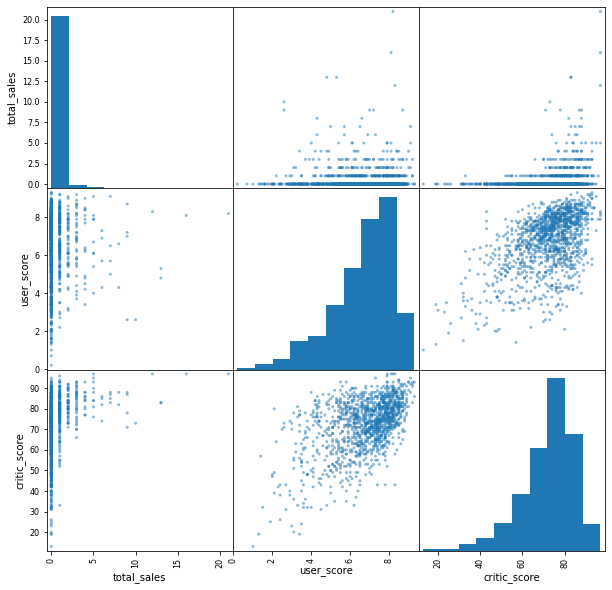

In [40]:
corr_data = games_data.query('year_of_release == [2012, 2013, 2014, 2015, 2016]')[['total_sales', 'user_score','critic_score']]
pd.plotting.scatter_matrix(corr_data, figsize = (10,10));

## Промежуточный вывод

Наблюдается положительная корреляция, но не очень значительная. В столбцах с оценками много пропусков, но это просто покажет нам менее явный результат. На тех данных, что у нас есть можно увидеть, что большинство результатов по выручке не растет при высоких оценках. Так что можно сделать вывод, что зависимости положительная, но незначительная. Не стоит рассчитывать на этот показатель при оценке будущей выручки.

----

### Поиск зависимостей по сгруппированным данным

Попробуем объединить прибыль по платформам и посмотреть зависимость так, для наглядности.

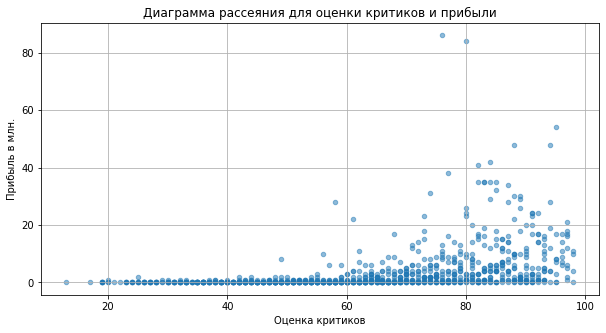

In [41]:
#сгруппируем данные по платформам и оценке критиков, найдем сумму выручки для каждой платформы
sum_sales_critic = (games_data
             .pivot_table(index=['platform','critic_score'], values='total_sales', aggfunc='sum')
             .reset_index('critic_score')  #достанем оценки критиков из индекса
)

#построим диаграмму рассеяния
sum_sales_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, figsize=(10,5))

plt.title('Диаграмма рассеяния для оценки критиков и прибыли')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль в млн.')

plt.show();

In [42]:
#посчитаем Коэффициент Пирсона по этим данным
sum_sales_critic['critic_score'].corr(sum_sales_critic['total_sales'])

0.4118742404468526

### Комментарий

Теперь видно лучше — небольшая положительная зависимость, платформы где игры заслуживают более высокие оценки приносят больше прибыли. Но она недостаточно явная, чтобы по ней судить.

----

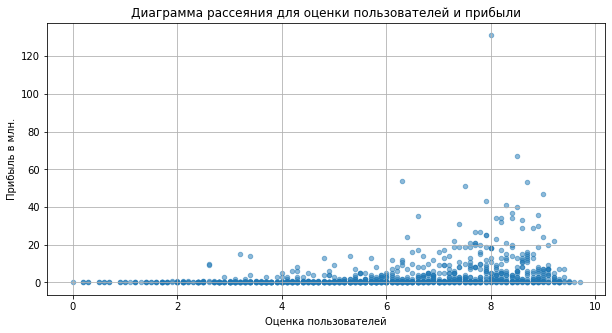

In [43]:
#сгруппируем данные по платформам и оценке пользователей, найдем сумму выручки для каждой платформы

sum_sales_users = (games_data
             .pivot_table(index=['platform','user_score'], values='total_sales', aggfunc='sum')
             .reset_index('user_score')
)


#построим диаграмму рассеяния
sum_sales_users.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, figsize=(10,5))

plt.title('Диаграмма рассеяния для оценки пользователей и прибыли')
plt.xlabel('Оценка пользователей')
plt.ylabel('Прибыль в млн.')

plt.show();

In [44]:
#посчитаем Коэффициент Пирсона по этим данным
sum_sales_users['user_score'].corr(sum_sales_users['total_sales'])

0.3053869152233067

### Комментарий

Здесь же зависимость все еще незначительная. А после оценки в 9 даже заметно снижение прибыли.

## Промежуточный вывод

Оценок в данных было мало — мы нашли много пропусков, но несмотря на это получилось построить диаграммы рассеяния, чтобы определить зависимости.

Большой положительной или отрицателной зависимости нет, но есть небольшая зависимость между оценкой критикой и прибылью от платформы. Для оценок от 60 до 90 можно наблюдать незначительную положительную корреляцию, однако больших значений здесь очень мало, так что не стоит делать большой упор на оценки при рассчете показателей для следующего года.

----

## Распределение игр по жанрам

Проанализируем общее распределение игр по жанрам, чтобы выбрать самые прибыльные жанры из представленных. Проверим, есть ли жанры, которые выделяются — где продажи выше или ниже остальных.

### Анализ по количеству выпущенных игр

Посмотрим как распределены жанры, если сравнивать их по количеству выпущенных игр.

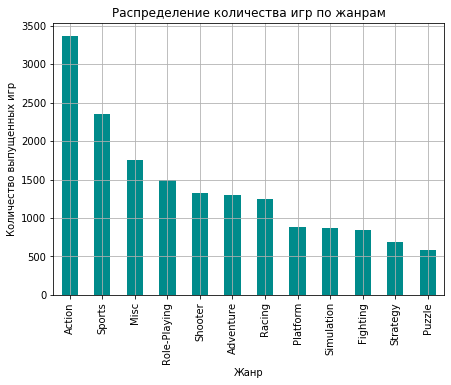

In [45]:
#построим общее распределние по жанрам
games_data['genre'].value_counts().plot(kind='bar', color='darkcyan', grid=True, figsize=(7,5))


plt.title('Распределение количества игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')

plt.show()

###  Комментарий

В общем распределение лидируют три жанра: **Action, Sports и Misc**. Меньше всего игр было выпущено в жанрах **Fighting, Strategy и Puzzle**. Посмотрим совпадают ли показатели, если рассматривать данные за последние два года в таблице.

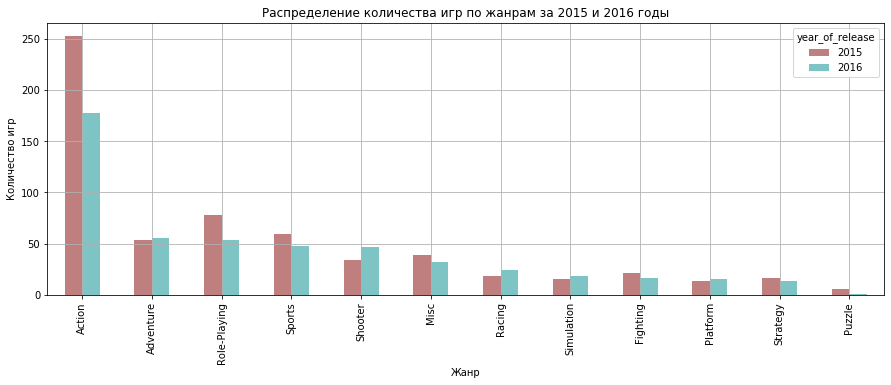

In [46]:
#построим распределение по жанрам за 2015 и 2016 годы

(games_data[['genre','year_of_release','name']] 
 .query('year_of_release == [2015,2016]')   
 .pivot_table(index='genre', columns='year_of_release', values='name', aggfunc='count')
 .sort_values(by=2016, ascending=False)
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('maroon', 'darkcyan'))
)

plt.title('Распределение количества игр по жанрам за 2015 и 2016 годы')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')

plt.show()

###  Комментарий

За последние два года больше всего игр было выпущено в жанре **Action**. При этом их значительно больше, чем в остальных жанрах. Например, за 2016 было выпущено около 175 игр в этом жанре, тогда как на втором месте в жанре **Role-Plaing** было выпущено около 75 игр. В остальных жанрах количество выпущенных игр не превышало 60.

## Анализ по выручке для каждого жанра

Теперь посмотрим какие жанры выделяются, если сравнивать их по суммарной выручке.

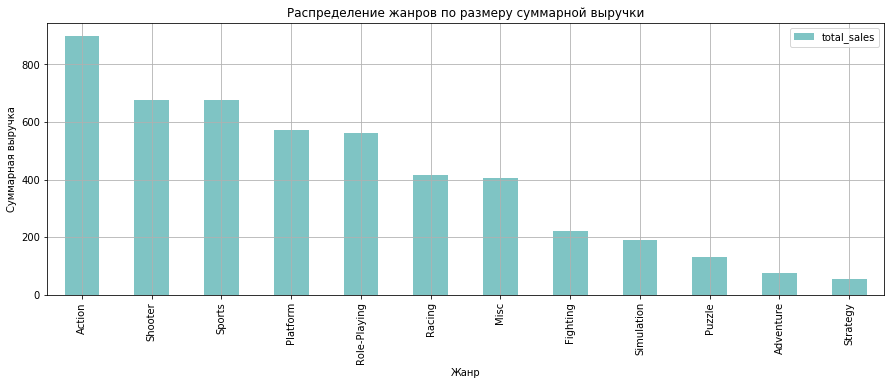

In [47]:
#построим распределение жанров по размеру суммарной выручки

(games_data[['genre','year_of_release','name','total_sales']] 
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color='darkcyan')
)

plt.title('Распределение жанров по размеру суммарной выручки')
plt.xlabel('Жанр')
plt.ylabel('Суммарная выручка')

plt.show()

###  Комментарий

Если смотреть данные за все годы, то больше всего выручки принесли игры в жанрах: **Action, Sport и Shooter**. Первые два жанра мы отмечали в распределние по количеству, так что можно предположить, что такая выручка появилась из-за большого количества выпущенных игр. А вот Shooter был на пятом месте, но оказалася выгодным судя по выручке. Можно предположить, что на игры этого жанра большой спрос. Посмотрим какие игры в этом жанре были самыми прибыльными.

In [48]:
games_data.query('genre == "Shooter"').sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12


###  Комментарий

Интересно, что одна только игра Duck Hunt получила в два раза больше прибыли (28 млн.), чем очень популярная игра Call of Duty (14 млн.). Игра Duck Hunt действительно была одной из самых популярных игр на первых консолях, и кажется почти каждый ее помнит. Одна эта игра прибавила значительную часть к выручке жанра Shooter.

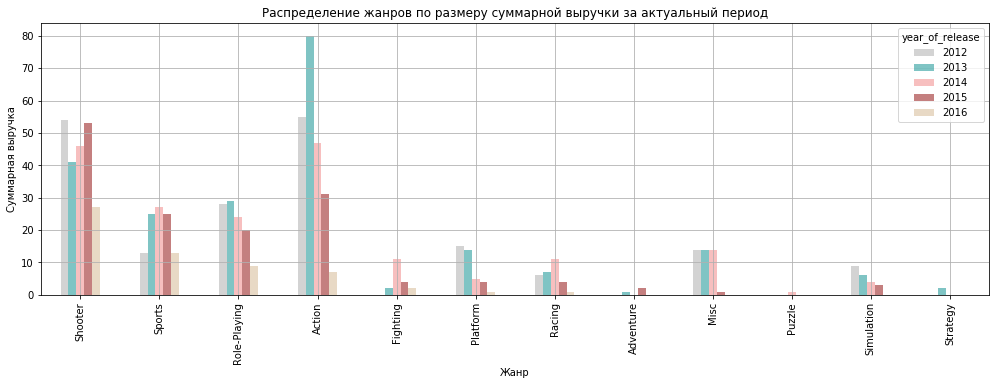

In [49]:
#построим распределение жанров по размеру суммарной выручки за актуальный период

(games_data[['genre','year_of_release','name','total_sales']]
 .query('year_of_release == [2012, 2013, 2014, 2015,2016]')   
 .pivot_table(index='genre', columns='year_of_release', values='total_sales', aggfunc='sum')
 .sort_values(by=2016, ascending=False)
 .plot(kind='bar', alpha=0.5, figsize=(17,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred', 'tan'))
)

plt.title('Распределение жанров по размеру суммарной выручки за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Суммарная выручка')

plt.show()

###  Комментарий

В 2015 году самыми прибыльными жанрами были: Shooter, Action и Sport. 

В 2016 году самыми прибыльными жанрами были такими же, но Sport немного обогнал по выручке Action.

При этом в целом выручка значительно снизилась — в 2015 году Shooter принес больше 50 млн., а в 2016 меньше 30 млн. Возможно это связано еще и с тем, что данные за 2016 год не полные, и продажи за весь годы могли быть больше.

## Анализ по платформам для каждого жанра

Возьмем четыре платформы, которые мы выделили выше и посмотрим как распределены показатели по жанрам для них.

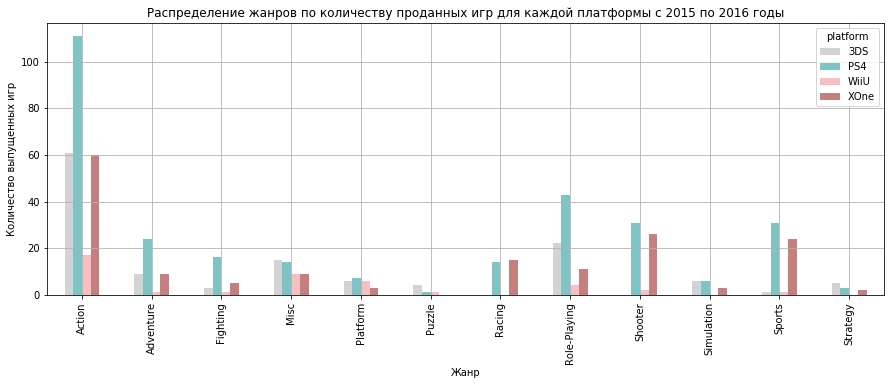

In [50]:
#построим распределение жанров по количеству проданных игр для каждой платформы за 2015 и 2016 годы

(games_data
 .query('year_of_release == [2015,2016]')
 .query('platform == ["PS4", "3DS", "XOne","WiiU"]')
 .pivot_table(index='genre', columns='platform', values='name', aggfunc='count')
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение жанров по количеству проданных игр для каждой платформы с 2015 по 2016 годы')
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')

plt.show()

### Комментарий

Теперь можно посмотреть какие жанры были наиболее востребованы для каждой платформы отдельно.

- Для PS4 больше покупают игры в жанрах: Action и Role-Playing
- Для XOne: Action и Shooter
- Для 3DS: Action и Role-Playing
- Для WiiU: Action и Misc

Также, стоит отметить, что по некоторым жанрам большие продажи не по всем платформам. Так, например, почти все продажи по жанрам Shooter и Sports приходятся на консоли PS4 и XOne, а консоли Nintendo по ним подаж почти не имеют. А в жанре Role-Playing большую выручку приносят консоли PS4 и 3DS. Значит при выборе игр для прогноза лучше учитывать для какой именно приставки разрабатывают больше игр в этом жанре.

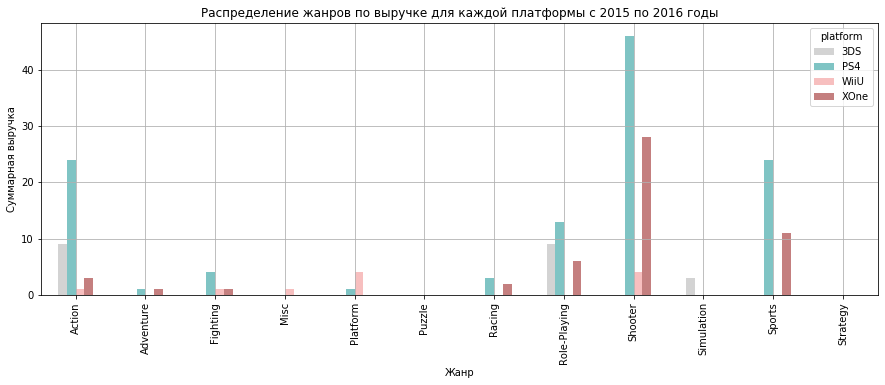

In [51]:
#построим распределение жанров по количеству проданных игр для каждой платформы за 2015 и 2016 годы
(games_data
 .query('year_of_release == [2015,2016]')
 .query('platform == ["PS4", "3DS", "XOne","WiiU"]')
 .pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение жанров по выручке для каждой платформы с 2015 по 2016 годы')
plt.xlabel('Жанр')
plt.ylabel('Суммарная выручка')

plt.show()

### Комментарий

Распределение показателей выручки для каждого жанра скажет нам больше, если рассматривать данные по каждой платформе.

- Максимальную выручку для платформы PS4 принесли жанры: Shooter (больше всех за последние два года), Sports и Action.
- Максимальную выручку для платформы XOne принесли жанры: Shooter (больше всех за последние два года), Sports и Action
- Максимальную выручку для платформы 3DS принесли жанры: Action, Role-Playing и Simulation
- Максимальную выручку для платформы WiiU принесли жанры: Platform и Shooter

## Промежуточный вывод

Некоторые жанры приносят значительно больше выручки из-за количества выпускаемых игр в этом жанре. Значит нужно оценить жанры по популярности, количеству и прошлогодней выручке.

Первое, что важно отметить — с 2015 по 2016 годы **выручка по каждому жанру значительно упала**. Это значит, что в целом продажи игр для консолей снизились. При этом **объем разрабатываемых и выпускаемых игр тоже снизился**, но не по всем жанрам. В жанре **Shooter** в 2016 году было выпущено значительно больше игр, несмотря на падение по выручке. Такой же показаель и у жанров **Adventure, Simulation, Racing и Platform**.

- Самыми прибыльными жанрами в 2015 году были: **Shooter, Action и Sport**
- Самыми прибыльными жанрами в 2016 году были: **Shooter, Sport и Role-Playing**


- В жанре Shooter основную выручку принесли платформы **PS4 и XOne**
- В жанре Action основную выручку принесли платформы **PS4 и 3DS**
- В жанре Sport основную выручку принесли платформы **PS4 и XOne**
- В жанре Role-Playing основную выручку принесли платформы **PS4 и 3DS**

По платформе WiiU продажи очень низкие. А такие жанры как Strategy и Puzzle вообще не имели прибыли.

## Вывод по исследовательскому анализу

#### 1. Cколько игр выпускалось в разные годы?

До 2010 года количество выпущенных игр увеличивалось, а после начало снижаться. 

До 1995 года игр выпускалось очень мало — меньше 400 в год. За 15 лет, с 1980 по 1995 годы было выпущено всего 707 игр. 

В 2006 году количество выпущенных игр превысило 100 в год, в 2008 и 2009 годах было выпущено больше 1400 игр, но после количество начало снижаться. К 2016 году количество выпущенных игр снизилось до 502 в год.

#### 2. Как менялись продажи по платформам?

Каждая новая консоль **Nintendo** приносила все меньше выручки с каждым годом. Для консоли **XOne** выручка росла до 2015 года, но в 2016 упала почти до выручки 2014 года. **Xbox** 360 была очень популярна в 2013 году, но с каждым годом продажи резко падали и в 2016 продаж было меньше, чем на один миллион. Выручка по **PS3** начала снижаться в 2014 году — как раз тогда появилась PS4. PlayStation 4 уже через год после запуска достигла прибыли больше 70 млн., а в 2015 — почти 80 млн. В 2016 выручка упала ниже 40 млн, но это все еще высокий показатель по графику.

#### 3. Какая платформа потенциально прибыльная?

**PlayStation 4** остается самой прибыльной, **XOne** на втором месте, Nintendo имеет наименее прибыльные продажи по своим консолям. В 2016 году выпустили больше игр для таких платформ, как: **PC, PS4 и XOne**. Можно предположить, что разработчики игр считают эти платформы перспективными, а потому выпускают больше игр для них.

Для некоторых плафтформ показатели снижаются в течение нескольких лет, несмотря на то, что в 2016 прибыль довольно высокая. Нужно отметить платформы, где выручка растет несколько лет — это **PS4, XOne и PC**.

#### 4. Как менялись глобальные продажи игр в разбивке по платформам?

Продажи по всем ведущим платформам снизились с 2015 по 2016 год. 
- PS4 в 2015 году принесла 79 млн., а в 2016 - 37 млн.
- XOne в 2015 году принесла 39 млн., а в 2016 - 13 млн.
- 3DS в 2015 году принесла 13 млн., а в 2016 - 8 млн.
- WiiU в 2015 году принесла 9 млн., а в 2016 - 2 млн.




#### 5. Как влияют отзывы пользователей и критиков на продажи?

Есть небольшая зависимость между отзывами критиков и прибылью, но она недостаточно значительная, чтобы брать ее как основной показатель для прогнозирования. Оценка пользователей не влияет на продажи.

#### 6. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Первое, что важно отметить — с 2015 по 2016 годы выручка по каждому жанру значительно упала. В жанре Shooter в 2016 году было выпущено значительно больше игр, несмотря на падение по выручке. Такой же показаель и у жанров Adventure, Simulation, Racing и Platform.

- Самыми прибыльными жанрами в 2015 году были: Shooter, Action и Sport
- Самыми прибыльными жанрами в 2016 году были: Shooter, Sport и Role-Playing


- В жанре Shooter основную выручку принесли платформы PS4 и XOne
- В жанре Action основную выручку принесли платформы PS4 и 3DS
- В жанре Sport основную выручку принесли платформы PS4 и XOne
- В жанре Role-Playing основную выручку принесли платформы PS4 и 3DS

По платформе WiiU продажи очень низкие. А такие жанры как Strategy и Puzzle вообще не имели прибыли.

---

# <a id="three"> Портрет пользователя каждого региона</a>

Определим для пользователя каждого региона:
    - топ-5 самых популярных платформ и опишем различия в долях продаж
    - топ-5 самых популярных жанров и опишем их различия
    - влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
У нас есть данные по продажам в Северной Америке, Европе, Японии и суммарные продажи в других странах. Сумма в столбцах представлена в миллионах долларов.

### Топ-5 самых популярных платформ для каждого региона

In [55]:
#посмотрим суммарную прибыль по каждой платформе для разных регионов
na = games_data\
    .groupby('platform')\
    .agg({'na_sales':'sum'})\
    .sort_values(by='na_sales', ascending=False)[:10]\
    .reset_index()\
    .rename(columns={'platform': 'na_platform'})
eu = games_data\
    .groupby('platform')\
    .agg({'eu_sales':'sum'})\
    .sort_values(by='eu_sales', ascending=False)[:10]\
    .reset_index()\
    .rename(columns={'platform': 'eu_platform'})
jp = games_data\
    .groupby('platform')\
    .agg({'jp_sales':'sum'})\
    .sort_values(by='jp_sales', ascending=False)[:10]\
    .reset_index()\
    .rename(columns={'platform': 'jp_platform'})

In [56]:
pd.concat([na, eu, jp], axis=1)

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,602.47,PS2,339.29,DS,175.57
1,PS2,583.84,PS3,330.29,PS,139.82
2,Wii,496.90,X360,270.76,PS2,139.20
3,PS3,393.49,Wii,262.21,SNES,116.55
4,DS,382.40,PS,213.61,3DS,100.67
5,PS,336.52,DS,188.89,NES,98.65
6,GBA,187.54,PC,142.44,GB,85.12
7,XB,186.69,PS4,141.09,PS3,80.19
8,N64,139.02,GBA,75.25,PSP,76.78
9,GC,133.46,PSP,66.68,Wii,69.33


In [54]:
#посмотрим суммарную прибыль по каждой платформе для других регионов
(games_data
 .query('year_of_release == [2015,2016]')
 .pivot_table(index='platform', values='other_sales', aggfunc='sum')
 .sort_values(by='other_sales', ascending=False)
)

,other_sales
platform,
PS4,28.70
XOne,7.71
PS3,2.49
3DS,1.67
WiiU,1.48
X360,1.22
PC,0.95
PSV,0.47
Wii,0.10


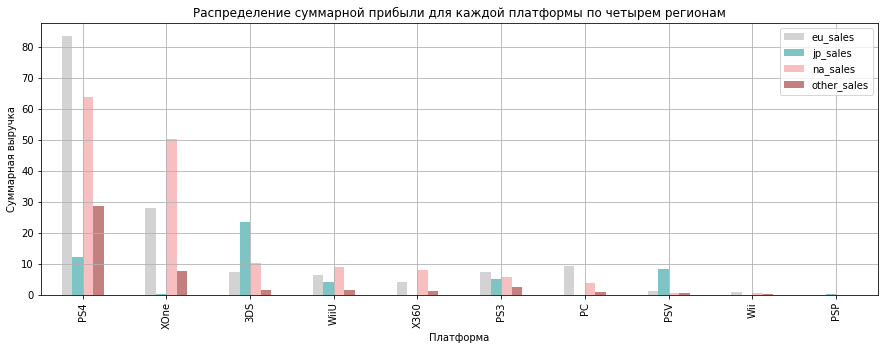

In [57]:
#построим распределение суммарной прибыли для каждой платформы по четырем регионам
(games_data
 .query('year_of_release == [2015,2016]')
 .pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение суммарной прибыли для каждой платформы по четырем регионам')
plt.xlabel('Платформа')
plt.ylabel('Суммарная выручка')

plt.show()

### Комментарий

Топ-5 самых популярных платформ для каждого региона

- В **Северной Америке** максимальная выручка была по следующим платформам: 1. PS4, 2. XOne, 3. 3DS, 4. WiiU, 5. X360
- В **Европе**: 1. PS4, 2. XOne, 3. PC, 4. 3DS, 5. PS3
- В **Японии**: 1. 3DS, 2. PS4, 3. PSV, 4. PS3, 5. WiiU
- Продажи **в других странах**: 1. PS4, 2. XOne, 3. PS3, 4. 3DS, 5. WiiU

----

## Топ-5 самых популярных жанров для каждого региона

Чтобы определить самые популярные жанры для каждого региона, найдем по каким жанрам в регионе были самые большие продажи и построим распределение.

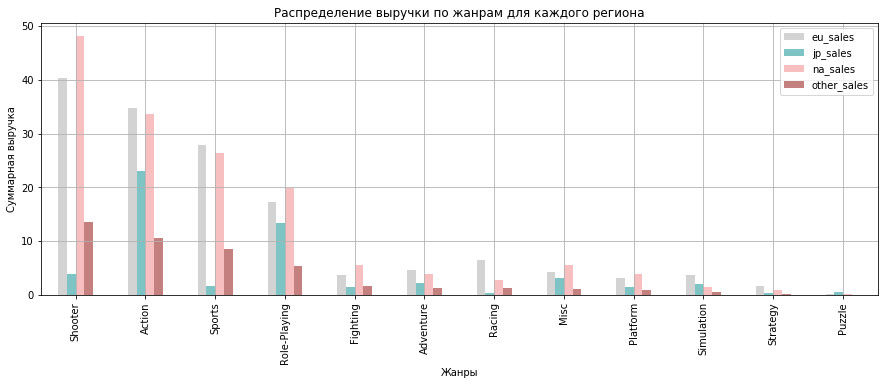

In [58]:
#построим распределение выручки по жанрам для каждого региона

(games_data
 .query('year_of_release == [2015,2016]')
 .pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
 .sort_values(by='other_sales', ascending=False)
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение выручки по жанрам для каждого региона')
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка')

plt.show()

### Комментарий

Топ-5 самых популярных жанров для каждого региона:

- В **Северной Америке** максимальная выручка была по следующим платформам: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Misc
- В **Европе**: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Racing
- В **Японии**: 1. Action, 2. Role-Playing, 3. Shooter, 4. Misc, 5. Adventure
- Продажи **в других странах**: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Fighting

----

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

«Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры».

- E — («Everyone») — «Для всех»
- T — («Teen») — «Подросткам 13—19 лет»
- M — («Mature») — «От 17 лет»
- E10+ — («Everyone 10 and older») — «Для всех старше 10 лет»
- EC — («Early childhood») — «Для детей младшего возраста»
- K-A — Первоначально "K-A" ("Kids to Adults"), сейчас («Everyone») — «Для всех»
- RP — («Rating Pending»») — «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоение рейтинга. 
- AO — («Adults Only 18+») — «Только для взрослых»

In [59]:
#посмотрим сколько игр с определеннным рейтингом выпущено
games_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

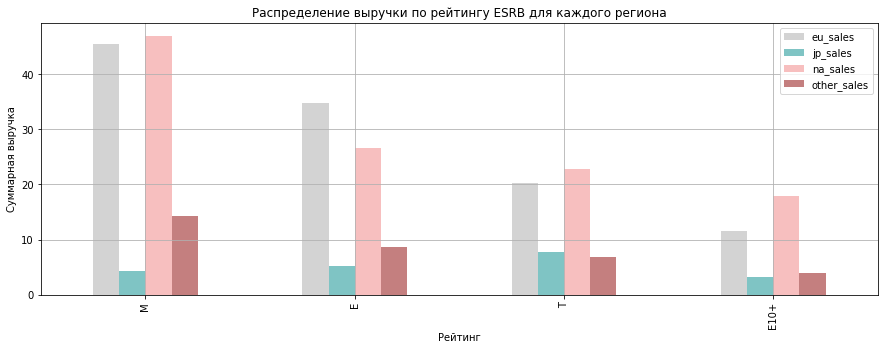

In [60]:
#распределение суммарных продаж по рейтингку для каждого региона

(games_data
 .query('year_of_release == [2015,2016]')
 .pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
 .sort_values(by='other_sales', ascending=False)
 .plot(kind='bar', alpha=0.5, figsize=(15,5), grid=True, color=('darkgray', 'darkcyan', 'lightcoral', 'darkred'))
)

plt.title('Распределение выручки по рейтингу ESRB для каждого региона')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарная выручка')

plt.show()

### Комментрий

В Америке, Европе и других регионах кроме Японии имеют самые большие продажи игр с рейтингом «M», затем с рейтингом «E», затем «T» и «E10+». В Японии же максимальные продажи для игр с рейтингом «T», а затем «E»,«M» и «E10+».

In [61]:
#также построим таблицу для наглядности — так мы увидим различия и сходства в данных

na = games_data\
    .groupby('genre')\
    .agg({'na_sales':'sum'})\
    .sort_values(by='na_sales', ascending=False)[:10]\
    .reset_index()\
    .rename(columns={'genre': 'na_genre'})
eu = games_data\
    .groupby('genre')\
    .agg({'eu_sales':'sum'})\
    .sort_values(by='eu_sales', ascending=False)[:10]\
    .reset_index()\
    .rename(columns={'genre': 'eu_genre'})
jp = games_data\
    .groupby('genre')\
    .agg({'jp_sales':'sum'})\
    .sort_values(by='jp_sales', ascending=False)[:10]\
    .reset_index()\
    .rename(columns={'genre': 'jp_genre'})

In [62]:
pd.concat([na, eu, jp], axis=1)\
    .style.set_table_styles(
        [{'selector': 'tr:hover',
          'props': [('background-color', '#0B62B9')]}]
)

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,879.01,Action,519.13,Role-Playing,355.41
1,Sports,684.43,Sports,376.79,Action,161.43
2,Shooter,592.24,Shooter,317.34,Sports,135.54
3,Platform,445.5,Racing,236.51,Platform,130.83
4,Misc,407.27,Misc,212.74,Misc,108.11
5,Racing,359.35,Platform,200.35,Fighting,87.48
6,Role-Playing,330.81,Role-Playing,188.71,Simulation,63.8
7,Fighting,223.36,Simulation,113.52,Puzzle,57.31
8,Simulation,181.92,Fighting,100.33,Racing,56.71
9,Puzzle,122.87,Adventure,63.54,Adventure,52.3


## Промежуточный вывод

#### 1. Топ-5 самых популярных платформ для каждого региона

- В **Северной Америке** максимальная выручка была по следующим платформам: 1. PS4, 2. XOne, 3. 3DS, 4. WiiU, 5. X360
- В **Европе**: 1. PS4, 2. XOne, 3. PC, 4. 3DS, 5. PS3
- В **Японии**: 1. 3DS, 2. PS4, 3. PSV, 4. PS3, 5. WiiU
- Продажи **в других странах**: 1. PS4, 2. XOne, 3. PS3, 4. 3DS, 5. WiiU

#### 2. Топ-5 самых популярных жанров для каждого региона

- В **Северной Америке** максимальная выручка была по следующим платформам: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Misc
- В **Европе**: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Racing
- В **Японии**: 1. Action, 2. Role-Playing, 3. Shooter, 4. Misc, 5. Adventure
- Продажи **в других странах**: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Fighting

#### 3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Игры с разным рейтингом действительно имеют разницу в продажах. При этом игры с наиболее прибыльным рейтингом в Японии отличаются от остального мира.

В Америке, Европе и других регионах кроме Японии имеют самые большие продажи игр с рейтингом «M», затем с рейтингом «E», затем «T» и «E10+». В Японии же максимальные продажи для игр с рейтингом «T», а затем «E»,«M» и «E10+».

--- 

## Сравнение портретов пользователей по разным регионам

Теперь мы имеем примерный портрет пользователя по каждому региону. Попробуем их сравнивать, что найти закономерности, особенности и различия.

In [63]:
#построим таблицу, где соберем все данные по каждому региону

columns = ['регион', 'топ-5 платформ', 'топ-5 жанров', 'ведущие рейтинги ESRB']
region_users = [
    ['Северная Америка', '1. PS4, 2. XOne, 3. 3DS, 4. WiiU, 5. X360', 'Shooter, Action, Sport, Role-Playing, Misc', '«M», «E», «T», «E10+»'],
    ['Европа', '1. PS4, 2. XOne, 3. PC, 4. 3DS, 5. PS3', 'Shooter, Action, Sport, Role-Playing, Racing', '«M», «E», «T», «E10+»'],
    ['Япония', '1. 3DS, 2. PS4, 3. PSV, 4. PS3, 5. WiiU', 'Action, Role-Playing, Shooter, Misc, Adventure', '«T», «E», «M»,«E10+»'],
    ['другие страны', '1. PS4, 2. XOne, 3. PS3, 4. 3DS, 5. WiiU', 'Shooter, Action, Sport, Role-Playing, Fighting', '«M», «E», «T», «E10+»']
]
region_users = pd.DataFrame(data = region_users, columns = columns)
region_users

,регион,топ-5 платформ,топ-5 жанров,ведущие рейтинги ESRB
0,Северная Америка,"1. PS4, 2. XOne, 3. 3DS, 4. WiiU, 5. X360","Shooter, Action, Sport, Role-Playing, Misc","«M», «E», «T», «E10+»"
1,Европа,"1. PS4, 2. XOne, 3. PC, 4. 3DS, 5. PS3","Shooter, Action, Sport, Role-Playing, Racing","«M», «E», «T», «E10+»"
2,Япония,"1. 3DS, 2. PS4, 3. PSV, 4. PS3, 5. WiiU","Action, Role-Playing, Shooter, Misc, Adventure","«T», «E», «M»,«E10+»"
3,другие страны,"1. PS4, 2. XOne, 3. PS3, 4. 3DS, 5. WiiU","Shooter, Action, Sport, Role-Playing, Fighting","«M», «E», «T», «E10+»"


## Комментарий

Портет пользователя в Японии значительно отличается от остальных регионов. Здесь лидирует платформа 3DS, а для этой платфорсы основной жанр был именно Action, так что в регионе этот жанр приносит наибольшую выручку. Также здесь большим спросом пользуются игры с рейтингом T — «Подросткам 13—19 лет».

По остальным регионам спрос примерно на одинаковые игры.

-----

# <a id="four"> Проверка гипотез</a>

Выдвинем две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Нам нужно сформулировать нулевую и альтернативную гипотезы, а затем определить критерий для проверки гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0) — Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

Альтернативная гипотеза (H1) — Средние пользовательские рейтинги платформ Xbox One и PC **не одинаковые**

Для проверки гипотезы воспользуемся статистикой разности, а именно критерием p-value.

### Обработка пропусков в столбце с рейтингом

In [64]:
#games_data['user_score'].isnull().sum()   #9125
#games_data.query('platform == "PC"')['user_score'].isnull().sum() #204
#games_data.query('platform == "XOne"')['user_score'].isnull().sum() #65 пропусков

Заполнение пропусков для платформ XOne может значительно повлиять на результат, поэтому лучше использовать имеющиеся данные — их достаточно для проведения теста.

In [65]:
games_data.query('platform == "PC"')['user_score'].mean()

7.062467532467533

In [66]:
games_data.query('platform == "XOne"')['user_score'].mean()

6.521428571428572

### Проверка гипотезы

In [67]:
#берем данные по двум платформам и только те, где есть оценка пользователей
xone_score = (games_data
 .query('platform == "XOne"')
 .query('user_score == user_score')
)

pc_score = (games_data
 .query('platform == "PC"')
 .query('user_score == user_score')
)

#проверяем гипотезу
xone_score = xone_score['user_score']
pc_score = pc_score['user_score']

alpha = .05

results = st.ttest_ind(
    xone_score, 
    pc_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, принимаем альтернативную")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу, принимаем альтернативную


### Комментарий

p-значение достаточно небольшое, что дает основание отвергнуть нулевую гипотезу и принять альтернативную. Средние пользовательские рейтинги платформ Xbox One и PC **не одинаковые**.

----

### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза (H0) — Средние пользовательские рейтинги жанров Action и Sports **одинаковые**

Альтернативная гипотеза (H1) — Средние пользовательские рейтинги жанров Action и Sports **не одинаковые**

Для проверки гипотезы воспользуемся статистикой разности, а именно критерием p-value.

In [68]:
#games_data[games_data['genre'] == 'Action']['user_score'].mean()  #7.054043715846995
#games_data[games_data['genre'] == 'Sports']['user_score'].mean()   #6.96119673617407

Для этих жанров не было пропусков еще до замены, так что показатели в них достоверные.

In [69]:
action_score = (games_data
 .query('genre == "Action"')
 .query('user_score == user_score')
)

sport_score = (games_data
 .query('genre == "Sports"')
 .query('user_score == user_score')
)

action_score = action_score['user_score']
sport_score = sport_score['user_score']

alpha = .05

results = st.ttest_ind(
    action_score, 
    sport_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, принимаем альтернативную")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


### Комментарий

p-значение больше, чем alpha показатель, значит мы не можем отвергнуть нулевую гипотезу — cредние пользовательские рейтинги жанров Action и Sports одинаковые

## Промежуточный вывод

После проверки гипотез можно сделать два вывода:

1. **Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые**, потому что p-значение достаточно небольшое, что дает основание отвергнуть нулевую гипотезу и принять альтернативную. 

2. **Cредние пользовательские рейтинги жанров Action и Sports одинаковые**, потому что p-значение больше, чем alpha показатель, значит мы не можем отвергнуть нулевую гипотезу.

----

# <a id="five"> Итоговый вывод</a>

### Цель проекта

Целью проекта была выявить определяющие успешность игры закономерности, благодаря которым можно будет найти потенциально популярный продукт и спланировать рекламные кампании.

Основные критерии для оценки успешности игры:
- Какая **консоль** сейчас наиболее популярна для выбранного региона и в целом по миру.
- Какие **жанры** сейчас наиболее популярны для выбранного региона и в целом по миру
- Какой **рейтинг ESRB** сейчас наиболее продаваемые для выбранного региона и в целом по миру

Все показатели собраны ниже.

----

### Общие замечания

- Продажи для консолей значительно больше по сравнению с PC, хотя можно отметить, что PC - это перспективное направление для разработчиков игр из-за ее универсальности.Такие продажи можно объяснить тем, что компании для консолей выкупают права на уникальные игры, в которые можно играть только на приставках. Из-за этого повышается спрос на ту или иную консоль.


- Есть небольшая зависимость между отзывами критиков и прибылью, но она недостаточно значительная, чтобы брать ее как основной показатель для прогнозирования. Оценка пользователей не влияет на продажи.


### Прибыль в разбивке по платформам

- Самые успешные платформы у трех компаний: **PlayStation, Xbox и Nintendo**.


- Самую большую суммарную выручку за все года принесла консоль PS2, но я думаю, что это связано с тем, что она вышла одна из первых и просуществовала много лет практически без конкурентов. На второй месте по выручке X360 (588 миллионов), на третьем Nintendo Wii (563 миллиона), и на четвертом PlayStation 3 (528 миллионов), но если рассматривать распределение выручки за последние четыре года в данных, то выводы немного меняются.


- **с 2013 по 2016 год** самые популярные консоли такие: на первом месте PlayStation 4 (205 миллионов), на втором PlayStation 3 (97 миллионов), на третьем Xbox One (96 миллионов).
- **PlayStation 4** уже через год после запуска достигла прибыли больше 70 млн., а в 2015 — почти 80 млн. В 2016 выручка упала ниже 40 млн, но это все еще высокий показатель по графику.
- Каждая новая консоль **Nintendo** приносила все меньше выручки с каждым годом. 
- Для консоли **XOne** выручка росла до 2015 года, но в 2016 упала почти до выручки 2014 года. PlayStation 4 уже через год после запуска достигла прибыли больше 70 млн., а в 2015 — почти 80 млн. В 2016 выручка упала ниже 40 млн, но это все еще высокий показатель по графику.


- **PlayStation 4** остается самой прибыльной, XOne на втором месте, Nintendo имеет наименее прибыльные продажи по своим консолям. В 2016 году выпустили больше игр для таких платформ, как: PC, PS4 и XOne. Можно предположить, что разработчики игр считают эти платформы перспективными, а потому выпускают больше игр для них.

#### Продажи по всем ведущим платформам снизились с 2015 по 2016 год.

- PS4 в 2015 году принесла 79 млн., а в 2016 - 37 млн.
- XOne в 2015 году принесла 39 млн., а в 2016 - 13 млн.
- 3DS в 2015 году принесла 13 млн., а в 2016 - 8 млн.
- WiiU в 2015 году принесла 9 млн., а в 2016 - 2 млн.


- В 2013 году лидировали PS3, X360 и 3DS
- В 2014 году: PS4, XOne и 3DS
- В 2015 году: PS4 и XOne
- В 2016 году: PS4 и XOne

#### За какой характерный срок появляются новые и исчезают старые платформы

Новые платформы часто появляются исходя из выпуска новых консолей конкурентов. Если же конкурентов нет, то новая консоль может просуществовать долго. Выпуск новой консоли напрямую зависит от появления новых консолей у конкурентов.

При существовании конкурентом платформа исчезает примерно через 6 лет, но если появляется консоль нового поколения в любой компании, то прошлые консоли начинают терять выручку.

#### Портет пользователя в разных регионах

Портет пользователя в Японии значительно отличается от остальных регионов. Здесь лидирует платформа 3DS, а для этой платфорсы основной жанр был именно Action, так что в регионе этот жанр приносит наибольшую выручку. Также здесь большим спросом пользуются игры с рейтингом T — «Подросткам 13—19 лет». По остальным регионам спрос примерно на одинаковые игры.

----

### Выводы по жанрам

**Первое, что важно отметить — с 2015 по 2016 годы выручка по каждому жанру значительно упала.** В жанре Shooter в 2016 году было выпущено значительно больше игр, несмотря на падение по выручке. Такой же показатель и у жанров Adventure, Simulation, Racing и Platform.

- Самыми прибыльными жанрами в 2015 году были: Shooter, Action и Sport
- Самыми прибыльными жанрами в 2016 году были: Shooter, Sport и Role-Playing


- В жанре Shooter основную выручку принесли платформы PS4 и XOne
- В жанре Action основную выручку принесли платформы PS4 и 3DS
- В жанре Sport основную выручку принесли платформы PS4 и XOne
- В жанре Role-Playing основную выручку принесли платформы PS4 и 3DS

По платформе WiiU продажи очень низкие. А такие жанры как Strategy и Puzzle вообще не имели прибыли.

#### Количество игр

- После 2010 года количество выпущенных игр начало снижаться, и продолжает падение.
- В 2006 году количество выпущенных игр превысило 100 в год, в 2008 и 2009 годах было выпущено больше 1400 игр, но после количество начало снижаться. К **2016 году** количество выпущенных игр снизилось до 502 в год.
- Для некоторых плафтформ показатели снижаются в течение нескольких лет, несмотря на то, что в 2016 прибыль довольно высокая. Нужно отметить платформы, где выручка растет несколько лет — это **PS4, XOne и PC**.

### Показатели по регионам

##### 1. Топ-5 самых популярных платформ для каждого региона

- В **Северной Америке** максимальная выручка была по следующим платформам: 1. PS4, 2. XOne, 3. 3DS, 4. WiiU, 5. X360
- В **Европе**: 1. PS4, 2. XOne, 3. PC, 4. 3DS, 5. PS3
- В **Японии**: 1. 3DS, 2. PS4, 3. PSV, 4. PS3, 5. WiiU
- Продажи **в других странах**: 1. PS4, 2. XOne, 3. PS3, 4. 3DS, 5. WiiU

##### 2. Топ-5 самых популярных жанров для каждого региона

- В **Северной Америке** максимальная выручка была по следующим платформам: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Misc
- В **Европе**: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Racing
- В **Японии**: 1. Action, 2. Role-Playing, 3. Shooter, 4. Misc, 5. Adventure
- Продажи **в других странах**: 1. Shooter, 2. Action, 3. Sport, 4. Role-Playing, 5. Fighting

##### 3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Игры с разным рейтингом действительно имеют разницу в продажах. При этом игры с наиболее прибыльным рейтингом в Японии отличаются от остального мира.

В Америке, Европе и других регионах кроме Японии имеют самые большие продажи игр с рейтингом «M», затем с рейтингом «E», затем «T» и «E10+». В Японии же максимальные продажи для игр с рейтингом «T», а затем «E»,«M» и «E10+».

----

### Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

-----

### Ошибки в данных

- Было много пропусков в оценках критиков и пользователей, при чем непонятно из-за чего такое могло произойти. 
- Оценки пользователей имели тип данных object, а при работе с данными такого формата лучше, если будет тип float или int
- Есть среднее количество пропусков в столбце, где указан год выпуска игры — этот показатель точно существует у каждой игры, и было бы хорошо выяснить, почему эти данные не внесены.

-----

### Рекомендации для компании

- Важно отметить, что PC выделяются далеко не по всем показателям, но разработчики создают больше игр с каждым годом — компьютеры никуда не исчезнут, и игры для них будут актуальны намного дольше, чем для игровых консолей, так что нужно выделить эту платформу несмотря на низкие продажи.

- Когда у компании появляется новая консоль, то продажи по последней консоли снижаются. При этом, если конкуренты не выпустили новую консоль в тот же год, то продажи на их старые консоли также упадут.

- Не следует руководствоваться только популярностью жанра — важно посмотреть для какой именно платформы популярен этот жанр, и отдельно оценить показатели по региону.

- Не стоит уделять большую значимость оценке пользователей и критика при прогнозировании на будущий год, зависимость небольшая.